In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [27]:
print(df.duplicated().sum()) # check for duplicates
clean =  df.drop_duplicates() # remove duplicates
final = clean.duplicated().sum() 
print(final)


1
0


In [28]:
print(df.isnull().sum()) # check for missing values


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [29]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [30]:
df['oldpeak'] = df['oldpeak'].astype(float)
print(df['oldpeak'])

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64


In [31]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [32]:
print(df.var())

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64


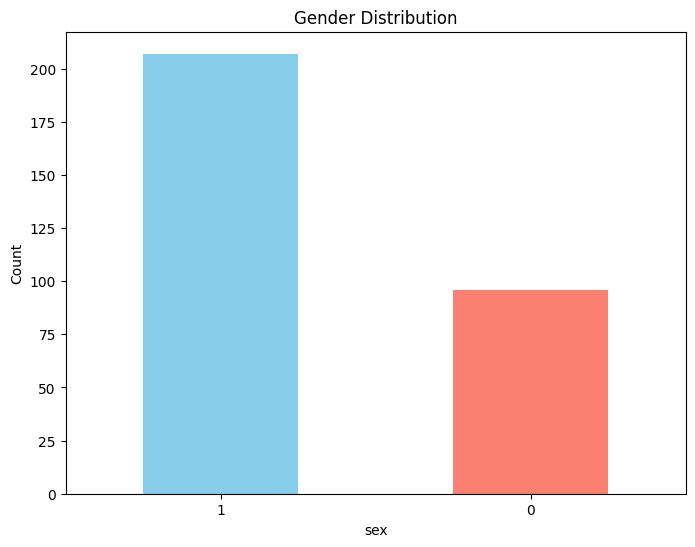

In [33]:
# bar graph of gender distribution

gender_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


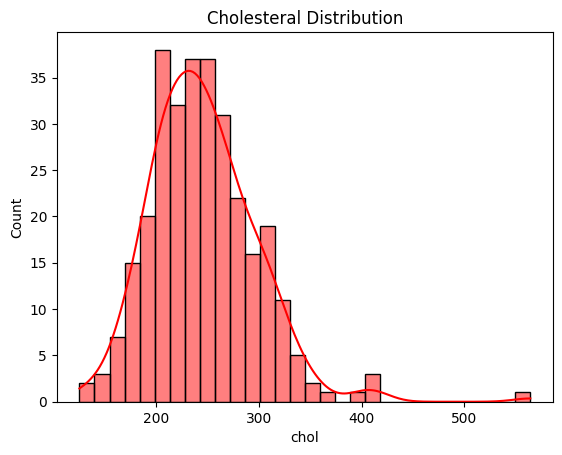

In [34]:
# histogram for chol distribution

sns.histplot(df['chol'],color='red',bins=30, kde=True)
plt.title('Cholesteral Distribution')
plt.show()

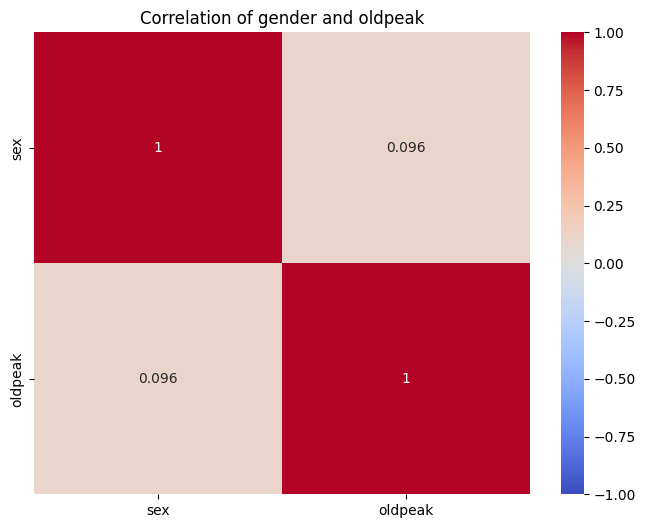

In [35]:
correlation_matrix = df[[ 'sex', 'oldpeak']].corr()
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of gender and oldpeak')
plt.show()


In [36]:
# FEATURE ENGINEERING
# select the top ten features based on the chi-squared test
from sklearn.feature_selection import SelectKBest, chi2

x = df.drop('target', axis=1)
y = df['target']

selector = SelectKBest(chi2, k=10)
x_new = selector.fit_transform(x,y)
selected_features = x.columns[selector.get_support()]

print('selected features:', selected_features)


selected features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [37]:
# Notes on the dataset:
# target column determines status;
# where 1 indicates a person with heart disease and,
 # 0 indicates a person without heart disease.

In [38]:
# Feature scaling and normalisation
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
#Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Normalize the features
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

# convert scaled feature back to dataframe
# x_scaled = pd.DataFrame(x_scaled, columns=selected_features)




In [39]:
from sklearn.feature_selection import SelectKBest, chi2

x = df.drop('target', axis=1)
y = df['target']

selector = SelectKBest(chi2, k=10)
x_new = selector.fit_transform(x,y)
selected_features = x.columns[selector.get_support()]

print('selected features:', selected_features)


selected features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [40]:
# Data splitting
from sklearn.model_selection import train_test_split

# loading the data
x = df.drop('target', axis=1)
y = df['target']
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# check the split
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (242, 13)
X_test shape: (61, 13)
y_train shape: (242,)
y_test shape: (61,)


In [41]:
# cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

x = df.drop('target', axis=1).values
y = df['target'].values

# create a logistic regression model
model = LogisticRegression(max_iter=1000)
# specify the cross validation strategy (kfold with k=7)
kfold = KFold(n_splits=7, shuffle=True, random_state=42)
# perform the cross validation
scores = cross_val_score(model, x, y, cv=kfold)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", np.mean(scores))



c:\Users\CORE i5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation Scores: [0.86363636 0.81818182 0.8372093  0.86046512 0.69767442 0.8372093
 0.81395349]
Mean Cross-Validation Score: 0.818332829960737


In [43]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x = df.drop('target', axis=1).values
y = df['target'].values

# scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# create a logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
# specify the cross validation strategy (stratifiedkfold with k=5)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# perform the cross validation
scores = cross_val_score(model, x, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", np.mean(scores))

Cross-Validation Scores: [0.90163934 0.85245902 0.7704918  0.81666667 0.86666667]
Mean Cross-Validation Score: 0.8415846994535517
